In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Making our dataset

# Taking 3 classes with two input features
np.random.seed(42)

cat_images = np.random.randn(700, 2) + np.array([0, -3])
mouse_images = np.random.randn(700, 2) + np.array([3, 3])
dog_images = np.random.randn(700, 2) + np.array([-3, 3])

In [3]:
a = cat_images[1]
print(a)
print(type(a))
print(a.shape)

[ 0.64768854 -1.47697014]
<class 'numpy.ndarray'>
(2,)


In [4]:
feature_set = np.vstack([cat_images, mouse_images, dog_images])
labels = np.array([0]*700 + [1]*700 + [2]*700)

In [5]:
 # One hot encoding 
#one_hot_labels = np.zeros((2100, 3))

#for i in range(2100):
    #one_hot_labels[i, labels[i]] = 1 
# This is for all data but here we will do it for only training data which is given below

In [6]:
#one_hot_labels

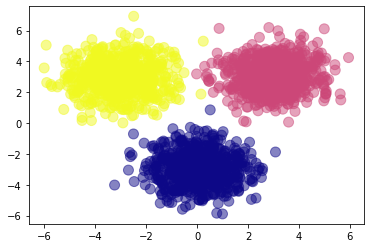

In [7]:
# Plotting the datasets
plt.scatter(feature_set[:,0], feature_set[:,1], c=labels, cmap='plasma', s=100, alpha=0.5)
plt.show()

##### Splitting our dataset into test and train set (70/30)

In [8]:
#Splitting Train set as 70% and Test set as 30%
from sklearn import datasets
from sklearn.model_selection import train_test_split
feature_set_train, feature_set_test, labels_train, labels_test = train_test_split(feature_set, labels, test_size = 0.3,
                                                                                 random_state = 1)

In [9]:
print(len(feature_set_train))
print(len(feature_set_test))
print(len(labels_train))
print(len(labels_test))

1470
630
1470
630


In [10]:
print("Feature train set shape: ",feature_set_train.shape)
print("Feature test set shape: ", feature_set_test.shape)
print("Label train set shape: ",labels_train.shape)
print("Label test set shape: ", labels_test.shape)

Feature train set shape:  (1470, 2)
Feature test set shape:  (630, 2)
Label train set shape:  (1470,)
Label test set shape:  (630,)


In [11]:
# One hot labels for training data 
one_hot_labels = np.zeros((1470, 3))
for i in range (1470):
    one_hot_labels[i, labels_train[i]] = 1

In [12]:
one_hot_labels

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [13]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))

def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

##### Traning network with two hidden layer

In [14]:
instances = feature_set_train.shape[0]
attributes = feature_set_train.shape[1]
hidden_nodes = 4
output_labels = 3

np.random.seed(42)

wh = np.random.rand(attributes,hidden_nodes)     # 2 * 4 
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes,output_labels)  # 4 * 3
bo = np.random.randn(output_labels)
lr = 10e-4

error_cost = []

for epoch in range(2000):
    
############# feedforward

    # Phase 1
    zh = np.dot(feature_set_train, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

########## Back Propagation

########## Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

########## Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set_train
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)
    
    if epoch % 200 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        print('Loss function value: ', loss)
        error_cost.append(loss)

Loss function value:  1924.1456230920944
Loss function value:  19.978058990059765
Loss function value:  11.115794899621
Loss function value:  8.20084373581878
Loss function value:  6.7420200377297075
Loss function value:  5.860419643947315
Loss function value:  5.265429271505925
Loss function value:  4.83337719073045
Loss function value:  4.502855960942436
Loss function value:  4.239963864460947


##### Classify the test data using trained neural network

In [25]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum()


In [16]:
 def prediction(test_data):
        
        predicted_class = np.zeros(test_data.shape[0], dtype = test_data.dtype)
        
        for i in range (len(test_data)):
            zh = np.dot(test_data[i], wh) + bh 
            ah = sigmoid(zh)
            zo = np.dot(ah, wo) + bo
            ao = softmax(zo)
            #ao = np.argmax(ao, axis = 1)
            ao = np.argmax(ao)
            predicted_class[i] = ao
            
        return predicted_class
            
        

In [17]:
predicted_test = prediction(feature_set_test)

In [18]:
predicted_test

array([2., 1., 0., 1., 2., 1., 2., 2., 1., 0., 1., 1., 1., 0., 1., 2., 2.,
       0., 1., 1., 2., 0., 0., 1., 1., 2., 0., 0., 2., 2., 0., 1., 2., 0.,
       0., 1., 0., 2., 2., 2., 0., 0., 1., 2., 1., 0., 0., 2., 1., 1., 1.,
       2., 0., 0., 2., 1., 0., 2., 0., 2., 1., 1., 2., 0., 1., 2., 2., 2.,
       2., 1., 0., 0., 2., 2., 2., 2., 0., 1., 1., 2., 2., 2., 0., 0., 0.,
       0., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 0., 2., 2., 1., 0., 1.,
       2., 0., 0., 2., 1., 2., 0., 2., 2., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 2., 0., 2., 2., 2., 0., 1., 1., 2., 1., 0., 1., 1., 2., 0., 0.,
       2., 1., 0., 1., 1., 1., 0., 0., 1., 2., 0., 0., 1., 1., 2., 1., 2.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 2., 1., 0., 1., 2., 1., 1., 1.,
       2., 2., 1., 1., 0., 1., 0., 2., 0., 2., 2., 1., 2., 1., 0., 0., 1.,
       0., 2., 1., 1., 2., 1., 0., 1., 0., 0., 1., 0., 1., 2., 0., 1., 0.,
       1., 1., 1., 1., 2., 2., 2., 1., 2., 1., 2., 2., 1., 1., 2., 1., 1.,
       2., 1., 2., 2., 0.

In [18]:
#printing the accuracy 
from sklearn.metrics import accuracy_score
ac = accuracy_score(labels_test,predicted_test)
print('Accuracy is: ', ac )

Accuracy is:  0.9968253968253968


In [19]:
a = feature_set_train.max(axis = 0)[0]
print(a)

5.949094425308726


In [20]:
b = feature_set_train.min(axis = 0)[0]
print(b)

-6.007632339693757


In [21]:
# Softmax
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

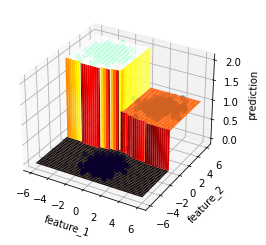

In [22]:
from mpl_toolkits.mplot3d import *
import matplotlib.pyplot as plt
import numpy as np
from random import random, seed
from matplotlib import cm


fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d

x = np.linspace(-6, 6,600)
y = np.linspace(-6, 6, 600)
X, Y = np.meshgrid(x,y)
data = np.transpose([X.flatten(), Y.flatten()])
# prediction for those concrete data
zh = np.dot(data, wh) + bh
ah = sigmoid(zh)

 # Phase 2
zo = np.dot(ah, wo) + bo
ao = softmax(zo)
Z = np.argmax(ao, axis = 1)
Z = Z.reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap=cm.hot);

n = 600
seed(0)                                     

ao_d = labels_test
x1_d = feature_set_test[:,0]
x2_d = feature_set_test[:,1]
ax.scatter3D(x1_d, x2_d, ao_d, c = labels_test, cmap = plt.cm.winter)
#ax.scatter(x1_d, x2_d, ao_d, color='k', alpha=None); 
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('prediction')
plt.show()


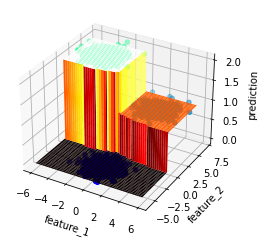

In [23]:
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d

#x = np.linspace(-6, 6,600)
x = np.linspace(feature_set_train.min(axis = 0)[0], feature_set_train.max(axis = 0)[0],600)
#y = np.linspace(-6, 6, 600)
y = np.linspace(feature_set_train.min(axis = 0)[0], feature_set_train.max(axis = 0)[0],600)
X, Y = np.meshgrid(x,y)
data = np.transpose([X.flatten(), Y.flatten()])
# prediction for those concrete data
zh = np.dot(data, wh) + bh
ah = sigmoid(zh)

 # Phase 2
zo = np.dot(ah, wo) + bo
ao = softmax(zo)
Z = np.argmax(ao, axis = 1)
Z = Z.reshape(X.shape)
ax.plot_surface(X, Y, Z, cmap=cm.hot);

n = 600
seed(0)                                     

ao_d = labels_train
x1_d = feature_set_train[:,0]
x2_d = feature_set_train[:,1]
ax.scatter3D(x1_d, x2_d, ao_d, c = labels_train, cmap = plt.cm.winter)
#ax.scatter(x1_d, x2_d, ao_d, color='k', alpha=None); 
ax.set_xlabel('feature_1')
ax.set_ylabel('feature_2')
ax.set_zlabel('prediction')
plt.show()